In [6]:
%matplotlib inline

### Perceptron
- 판별함수를 통해 분류를 하는 비확률적모형

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
np.in1d(iris.target, [0,2])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [3]:
idx = np.in1d(iris.target, [0,2])
x = iris.data[idx, 0:2]
y = iris.target[idx]

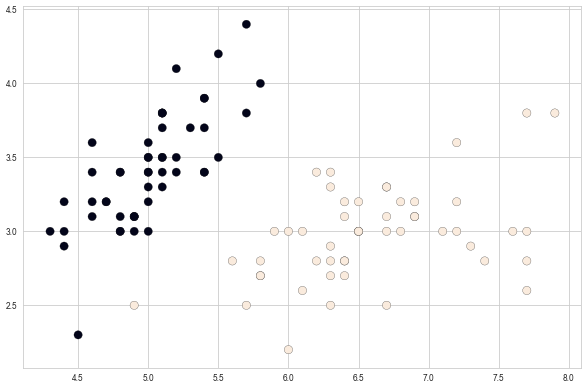

In [11]:
plt.figure(figsize=(12,8), dpi=60)
plt.scatter(x[:,0], x[:,1], c=y, s=100, edgecolors='k')
plt.show()

In [12]:
from sklearn.linear_model import Perceptron

In [27]:
def plot_perceptron(n):
    plt.figure(figsize=(12,8), dpi=60)
    model = Perceptron(max_iter=n, eta0=0.1, random_state=1).fit(x,y)
    
    xx_min = x[:,0].min() - 1
    xx_max = x[:,0].max() + 1
    yy_min = x[:,1].min() - 1
    yy_max = x[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 1000), np.linspace(yy_min, yy_max, 1000))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    
    plt.contourf(xx, yy, zz, cmap=cmap)
    plt.scatter(x[:,0], x[:,1], s=50, linewidths=2, edgecolors='k', c=y, cmap=cmap)
    plt.xlim(xx_min, xx_max)
    plt.ylim(yy_min, yy_max)
    plt.grid(False)
    plt.show

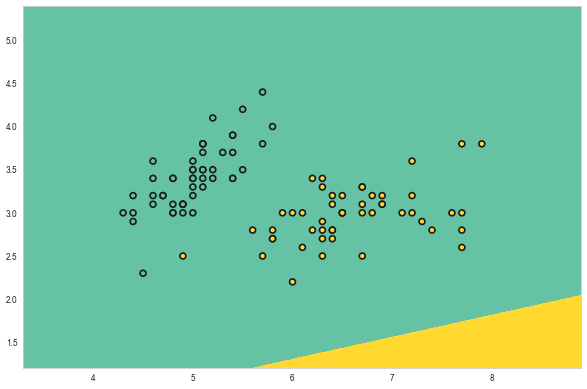

In [28]:
plot_perceptron(1)

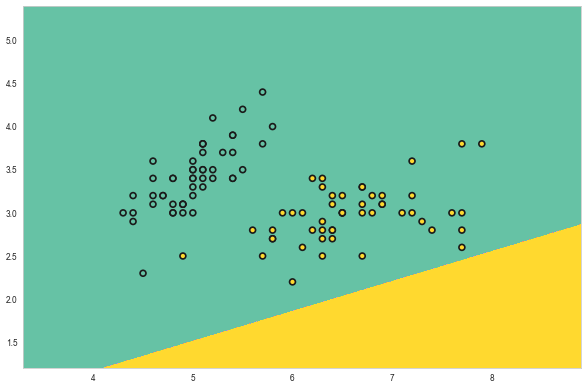

In [29]:
plot_perceptron(2)

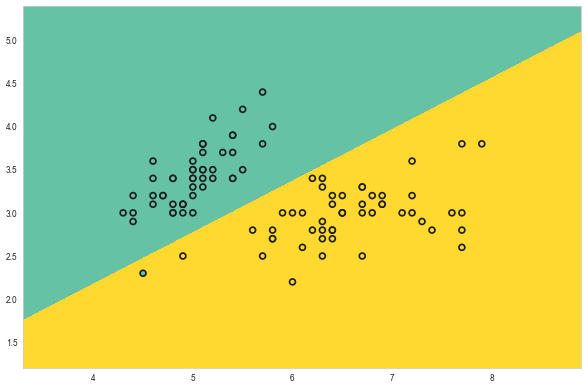

In [30]:
plot_perceptron(3)

In [31]:
from ipywidgets import widgets

In [32]:
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',))

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
model_perceptron = Perceptron(max_iter=500, eta0=0.1, random_state=1).fit(x,y)

In [46]:
confusion_matrix(y, model_perceptron.predict(x))

array([[50,  0],
       [ 0, 50]], dtype=int64)

In [37]:
print(classification_report(y, model_perceptron.predict(x)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100



##### SGD Classifier

In [38]:
from sklearn.linear_model import SGDClassifier

In [39]:
def plot_sgd(n):
    plt.figure(figsize=(12,8), dpi=60)
    model = SGDClassifier(loss='hinge', max_iter=n, random_state=1).fit(x,y)
    
    xx_min = x[:,0].min() - 1
    xx_max = x[:,0].max() + 1
    yy_min = x[:,1].min() - 1
    yy_max = x[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 1000), np.linspace(yy_min, yy_max, 1000))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    
    plt.contourf(xx, yy, zz, cmap=cmap)
    plt.scatter(x[:,0], x[:,1], s=50, linewidths=2, edgecolors='k', c=y, cmap=cmap)
    plt.xlim(xx_min, xx_max)
    plt.ylim(yy_min, yy_max)
    plt.grid(False)
    plt.show

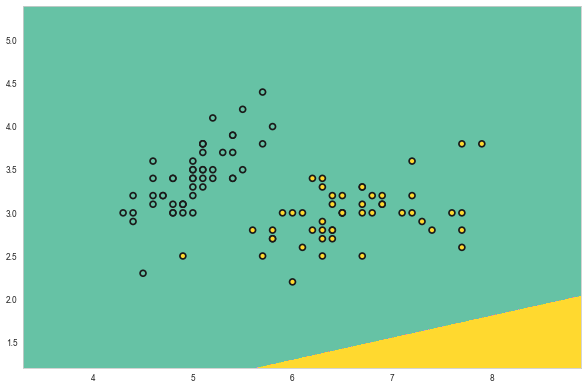

In [40]:
plot_sgd(1)

In [41]:
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1,max=100,step=1,value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',))

In [48]:
model_sgd = SGDClassifier(loss="hinge", max_iter=1000, random_state=1).fit(x, y)
confusion_matrix(y, model_sgd.predict(x))

array([[50,  0],
       [ 0, 50]], dtype=int64)

In [50]:
print(classification_report(y, model_sgd.predict(x)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100

